In [80]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [81]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [82]:
filenames = os.listdir("./dogs-cats-mini")

In [83]:
categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [84]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [85]:
df.head()

filename  category
0   dog.8011.jpg         1
1   cat.5077.jpg         0
2   dog.7322.jpg         1
3   cat.2718.jpg         0
4  cat.10151.jpg         0

In [86]:
df.tail()

filename  category
24995   dog.8008.jpg         1
24996   dog.1992.jpg         1
24997  dog.12412.jpg         1
24998   cat.2701.jpg         0
24999  cat.10148.jpg         0

<Axes: xlabel='category'>

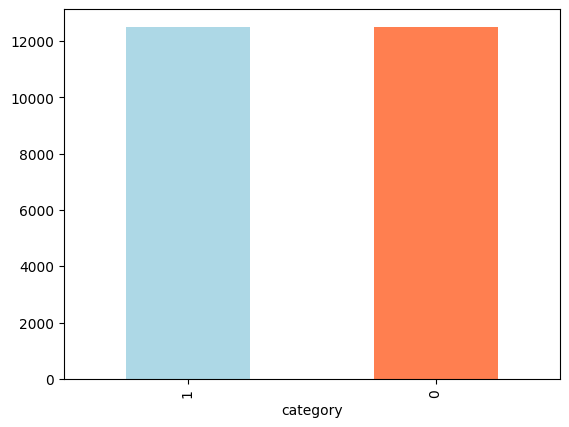

In [87]:
df['category'].value_counts().plot.bar(color=['lightblue', 'coral'])

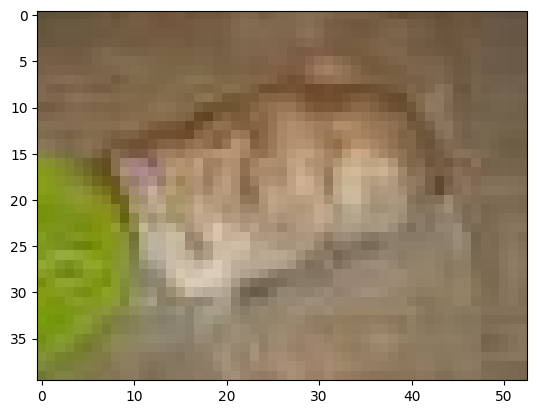

In [88]:
sample = random.choice(filenames)
image = load_img("./dogs-cats-mini/"+sample)
plt.imshow(image)

In [89]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [90]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [91]:
def create_model(
    optimizer="rmsprop", activation="relu", dropout_rate=0.25, num_conv_layers=3
):
    model = Sequential()

    model.add(
        Conv2D(
            32,
            (3, 3),
            activation=activation,
            input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
        )
    )
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    for _ in range(num_conv_layers - 1):
        model.add(Conv2D(64, (3, 3), activation=activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout_rate))

    model.add(Flatten())
    model.add(Dense(512, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation="softmax"))

    model.compile(
        loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
    )

    return model

In [92]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [93]:
earlystop = EarlyStopping(patience=10)

In [94]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [95]:
callbacks = [earlystop, learning_rate_reduction]

In [96]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [97]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='category'>

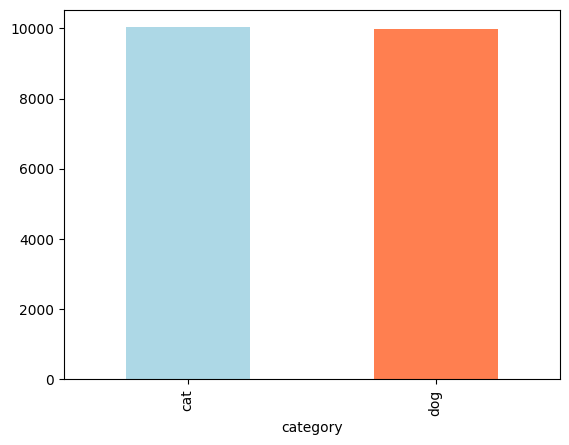

In [98]:
train_df['category'].value_counts().plot.bar( color=['lightblue', 'coral'])

<Axes: xlabel='category'>

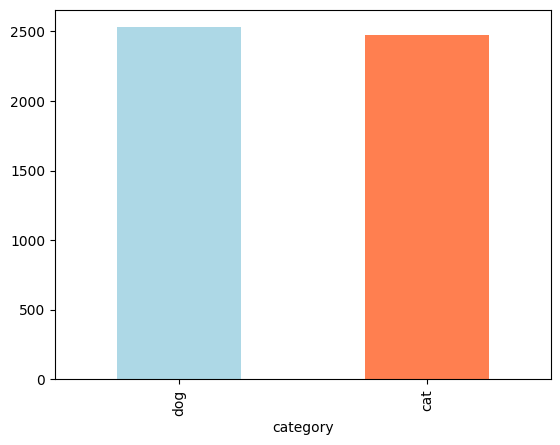

In [99]:
validate_df['category'].value_counts().plot.bar(color=['lightblue', 'coral'])

In [100]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [101]:
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(train_df, "./dogs-cats-mini/", x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [102]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(validate_df, "./dogs-cats-mini/", x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [103]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(example_df, "./dogs-cats-mini/", x_col='filename', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


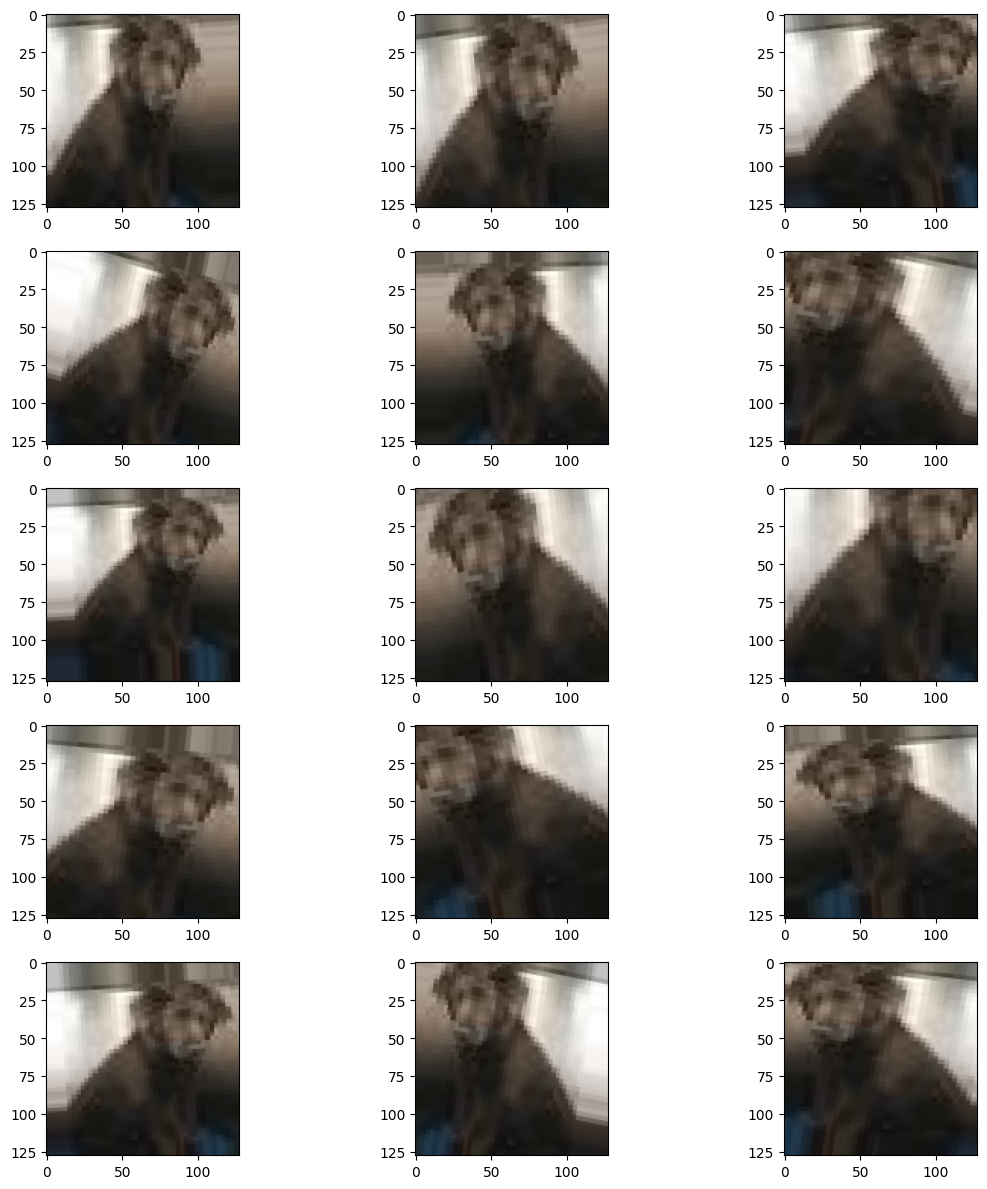

In [104]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [105]:
configs = [
    {
        "optimizer": "adam",
        "activation": "relu",
        "dropout_rate": 0.25,
        "num_conv_layers": 3,
    },
    {
        "optimizer": "rmsprop",
        "activation": "tanh",
        "dropout_rate": 0.25,
        "num_conv_layers": 3,
    },
    {
        "optimizer": "adam",
        "activation": "relu",
        "dropout_rate": 0.25,
        "num_conv_layers": 4,
    },
    {
        "optimizer": "adam",
        "activation": "relu",
        "dropout_rate": 0.3,
        "num_conv_layers": 3,
    },
]

In [106]:
histories = []

In [107]:
epochs = 3 if FAST_RUN else 6
for config in configs:
    print(f"Training with config: {config}")
    model = create_model(**config)
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=total_validate // batch_size,
        steps_per_epoch=total_train // batch_size,
        callbacks=callbacks,
    )
    model.save(
        f"model_{config['optimizer']}_{config['activation']}_{config['dropout_rate']}_{config['num_conv_layers']}.h5"
    )
    histories.append(history.history)

Training with config: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.25, 'num_conv_layers': 3}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 296s 220ms/step - accuracy: 0.5904 - loss: 0.9028 - val_accuracy: 0.6450 - val_loss: 0.6356 - learning_rate: 0.0010
Epoch 2/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 1s 85us/step - accuracy: 0.5333 - loss: 0.8177 - val_accuracy: 0.6000 - val_loss: 0.5713 - learning_rate: 0.0010
Epoch 3/6


2024-06-03 20:49:55.290017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-03 20:49:55.362576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 296s 222ms/step - accuracy: 0.6586 - loss: 0.6348 - val_accuracy: 0.6737 - val_loss: 0.6115 - learning_rate: 0.0010
Epoch 4/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.6667 - loss: 0.5466 - val_accuracy: 0.6000 - val_loss: 0.9253 - learning_rate: 0.0010
Epoch 5/6


2024-06-03 20:54:51.790035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 20:54:51.823790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 252s 189ms/step - accuracy: 0.6717 - loss: 0.6093 - val_accuracy: 0.6993 - val_loss: 0.6070 - learning_rate: 0.0010
Epoch 6/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.8667 - loss: 0.5021 - val_accuracy: 0.8000 - val_loss: 0.5609 - learning_rate: 0.0010


2024-06-03 20:59:04.323384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 20:59:04.381761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Training with config: {'optimizer': 'rmsprop', 'activation': 'tanh', 'dropout_rate': 0.25, 'num_conv_layers': 3}
Epoch 1/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 274s 205ms/step - accuracy: 0.5407 - loss: 0.8158 - val_accuracy: 0.5271 - val_loss: 0.7776 - learning_rate: 0.0010
Epoch 2/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.4000 - loss: 0.8120 - val_accuracy: 0.2000 - val_loss: 0.8148 - learning_rate: 0.0010
Epoch 3/6


2024-06-03 21:03:39.085828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:03:39.129028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 270s 202ms/step - accuracy: 0.5690 - loss: 0.7017 - val_accuracy: 0.6452 - val_loss: 0.6341 - learning_rate: 0.0010
Epoch 4/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.5333 - loss: 0.7396 - val_accuracy: 0.4000 - val_loss: 0.7604 - learning_rate: 0.0010
Epoch 5/6


2024-06-03 21:08:09.445021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:08:09.475893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5868 - loss: 0.6933
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 279s 209ms/step - accuracy: 0.5868 - loss: 0.6933 - val_accuracy: 0.5688 - val_loss: 0.7529 - learning_rate: 0.0010
Epoch 6/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.7333 - loss: 0.5793 - val_accuracy: 0.4000 - val_loss: 0.7910 - learning_rate: 5.0000e-04


2024-06-03 21:12:48.464116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:12:48.493057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Training with config: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.25, 'num_conv_layers': 4}
Epoch 1/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 262s 196ms/step - accuracy: 0.5792 - loss: 0.9523 - val_accuracy: 0.6501 - val_loss: 0.6244 - learning_rate: 0.0010
Epoch 2/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.4667 - loss: 0.7123 - val_accuracy: 0.8000 - val_loss: 0.4035 - learning_rate: 0.0010
Epoch 3/6


2024-06-03 21:17:11.645070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:17:11.671851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 237s 178ms/step - accuracy: 0.6480 - loss: 0.6412 - val_accuracy: 0.6863 - val_loss: 0.5925 - learning_rate: 0.0010
Epoch 4/6
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 6:46 305ms/step - accuracy: 0.8667 - loss: 0.4712
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 0.8667 - loss: 0.4712 - val_accuracy: 0.6000 - val_loss: 0.4950 - learning_rate: 0.0010
Epoch 5/6


2024-06-03 21:21:09.104780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:21:09.146397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 236s 177ms/step - accuracy: 0.6833 - loss: 0.5965 - val_accuracy: 0.7283 - val_loss: 0.5572 - learning_rate: 5.0000e-04
Epoch 6/6
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 4:39 210ms/step - accuracy: 0.6667 - loss: 0.5863
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.6667 - loss: 0.5863 - val_accuracy: 0.8000 - val_loss: 0.5347 - learning_rate: 5.0000e-04


2024-06-03 21:25:05.243962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:25:05.274530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Training with config: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.3, 'num_conv_layers': 3}
Epoch 1/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 262s 196ms/step - accuracy: 0.5686 - loss: 0.9487 - val_accuracy: 0.6190 - val_loss: 0.8904 - learning_rate: 0.0010
Epoch 2/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.4000 - loss: 0.8170 - val_accuracy: 0.6000 - val_loss: 1.3933 - learning_rate: 0.0010
Epoch 3/6


2024-06-03 21:29:28.359716: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:29:28.385434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 275s 206ms/step - accuracy: 0.6441 - loss: 0.6476 - val_accuracy: 0.6675 - val_loss: 0.6277 - learning_rate: 0.0010
Epoch 4/6
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.6667 - loss: 0.6973 - val_accuracy: 0.8000 - val_loss: 0.3644 - learning_rate: 0.0010
Epoch 5/6


2024-06-03 21:34:03.330963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:34:03.371288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 271s 203ms/step - accuracy: 0.6591 - loss: 0.6234 - val_accuracy: 0.6809 - val_loss: 0.5929 - learning_rate: 0.0010
Epoch 6/6
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 5:59 270ms/step - accuracy: 0.8000 - loss: 0.6573
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.8000 - loss: 0.6573 - val_accuracy: 0.4000 - val_loss: 0.9208 - learning_rate: 0.0010


2024-06-03 21:38:34.860434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-03 21:38:34.903938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [108]:
import pickle

with open("histories.pkl", "wb") as f:
    pickle.dump(histories, f)

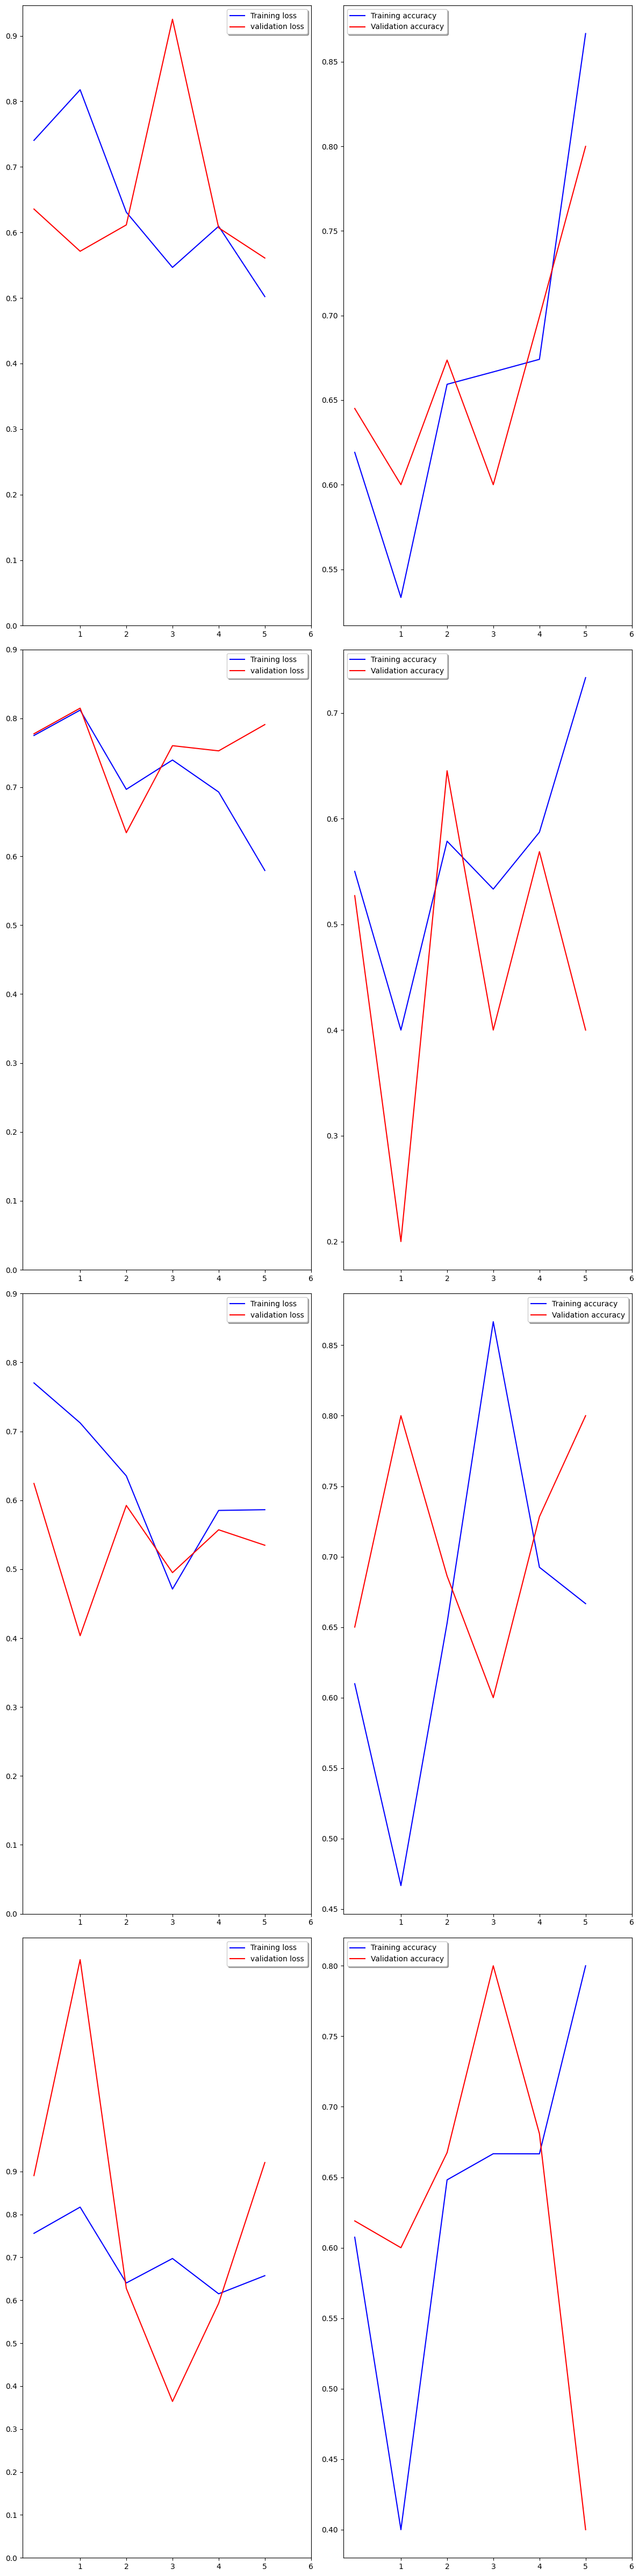

In [109]:
fig, axes = plt.subplots(len(histories), 2, figsize=(12, 12 * len(histories)))

for i, history in enumerate(histories):
    ax1, ax2 = axes[i]
    ax1.plot(history["loss"], color="b", label="Training loss")
    ax1.plot(history["val_loss"], color="r", label="validation loss")
    ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history["accuracy"], color="b", label="Training accuracy")
    ax2.plot(history["val_accuracy"], color="r", label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs + 1, 1))

    ax1.legend(loc="best", shadow=True)
    ax2.legend(loc="best", shadow=True)

plt.tight_layout()
plt.show()

In [110]:
best_idx = np.argmax([max(h["val_accuracy"]) for h in histories])
best_config = configs[best_idx]
print(f"Best config: {best_config}")

Best config: {'optimizer': 'adam', 'activation': 'relu', 'dropout_rate': 0.25, 'num_conv_layers': 3}


In [121]:
from tensorflow.keras.models import load_model

best_model_path = f"model_{best_config['optimizer']}_{best_config['activation']}_{best_config['dropout_rate']}_{best_config['num_conv_layers']}.h5"
best_model = load_model(best_model_path)



<Sequential name=sequential_3, built=True>

In [112]:
# Predykcje na zbiorze testowym przy użyciu najlepszego modelu
test_filenames = os.listdir("./test1")
test_df = pd.DataFrame({"filename": test_filenames})
nb_samples = test_df.shape[0]

In [113]:
test_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./test1",
    x_col="filename",
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
)

Found 12500 validated image filenames.


In [114]:
predict = best_model.predict(
    test_generator, steps=int(np.ceil(nb_samples / batch_size))
)

834/834 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step


In [115]:
label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df["category"] = [label_map[k] for k in np.argmax(predict, axis=1)]

In [116]:
test_df["category"] = test_df["category"].replace({"dog": 1, "cat": 0})

/var/folders/__/gfdqjrkx7vnchgntyh02zn480000gn/T/ipykernel_46499/1835886986.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["category"] = test_df["category"].replace({"dog": 1, "cat": 0})


<Axes: xlabel='category'>

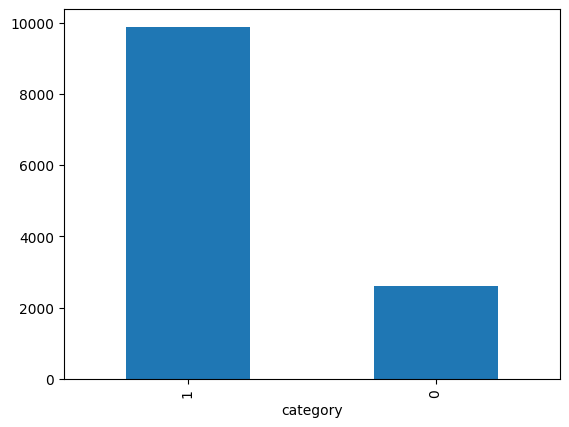

In [117]:
test_df["category"].value_counts().plot.bar()

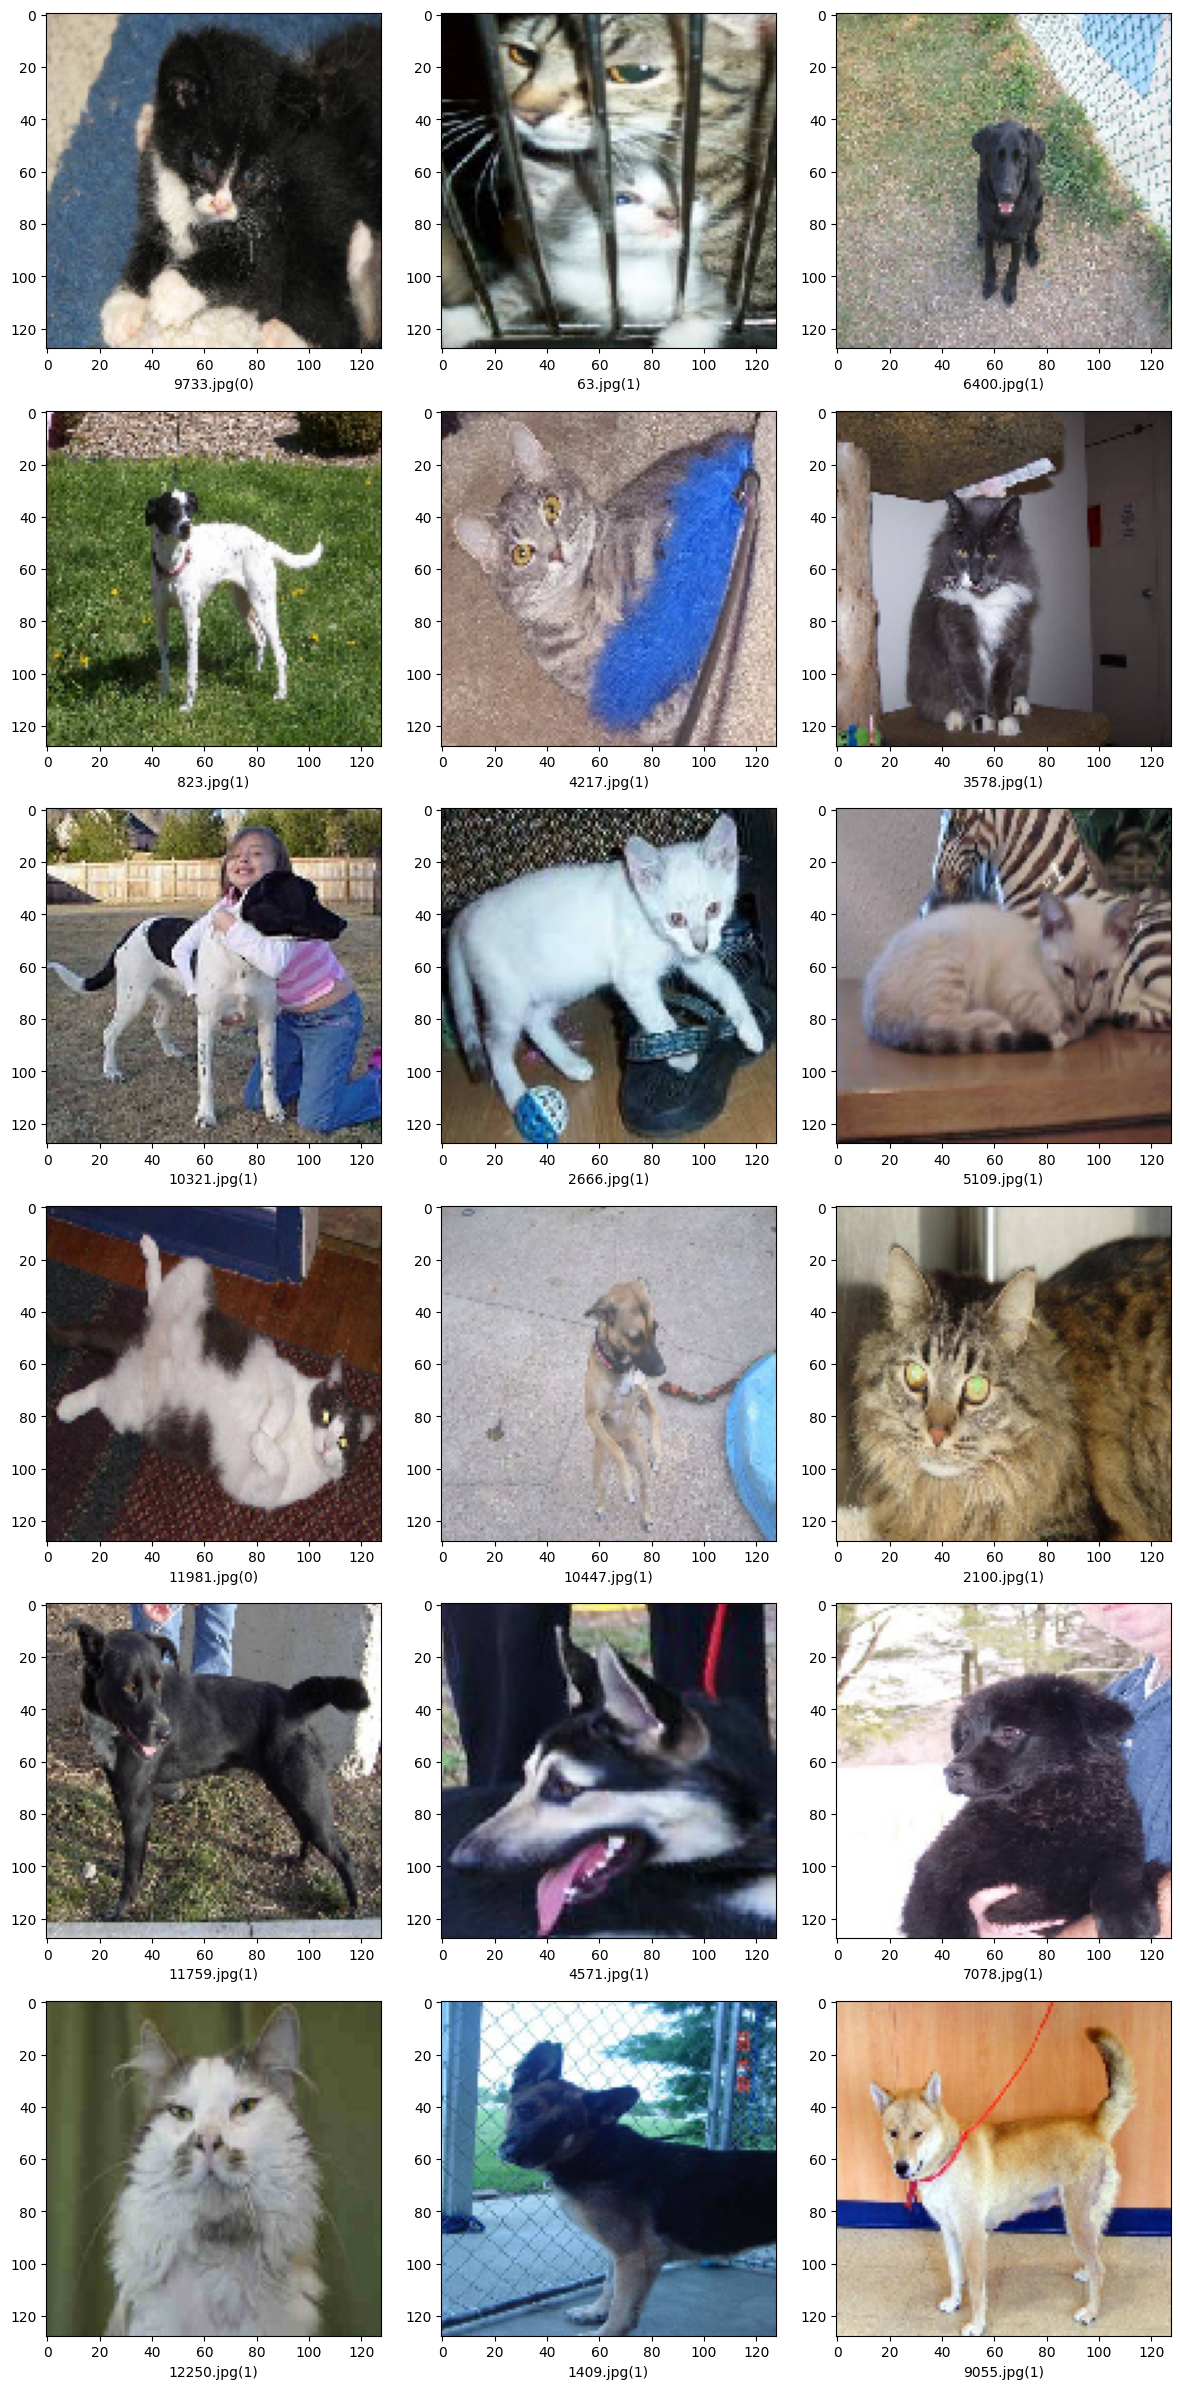

In [127]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row["filename"]
    category = row["category"]
    img = load_img("./test1/" + filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + "(" + "{}".format(category) + ")")
plt.tight_layout()
plt.show()

In [119]:
submission_df = test_df.copy()
submission_df["id"] = submission_df["filename"].str.split(".").str[0]
submission_df["label"] = submission_df["category"]
submission_df.drop(["filename", "category"], axis=1, inplace=True)
submission_df.to_csv("submission.csv", index=False)

other model

In [129]:
first_model = load_model("model.h5")


Found 12500 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


834/834 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step


/var/folders/__/gfdqjrkx7vnchgntyh02zn480000gn/T/ipykernel_46499/1977604641.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["category"] = test_df["category"].replace({"dog": 1, "cat": 0})


<Axes: xlabel='category'>

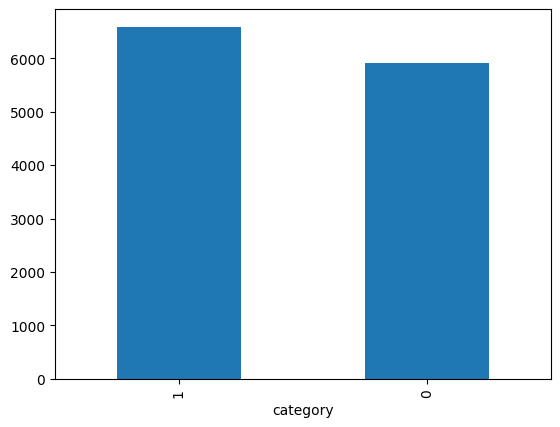

In [130]:
# test first_model na zbiorze testowym

test_filenames = os.listdir("./test1")
test_df = pd.DataFrame({"filename": test_filenames})
nb_samples = test_df.shape[0]

test_gen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./test1",
    x_col="filename",
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
)

predict = first_model.predict(
    test_generator, steps=int(np.ceil(nb_samples / batch_size))
)

label_map = dict((v, k) for k, v in train_generator.class_indices.items())
test_df["category"] = [label_map[k] for k in np.argmax(predict, axis=1)]

test_df["category"] = test_df["category"].replace({"dog": 1, "cat": 0})

test_df["category"].value_counts().plot.bar()

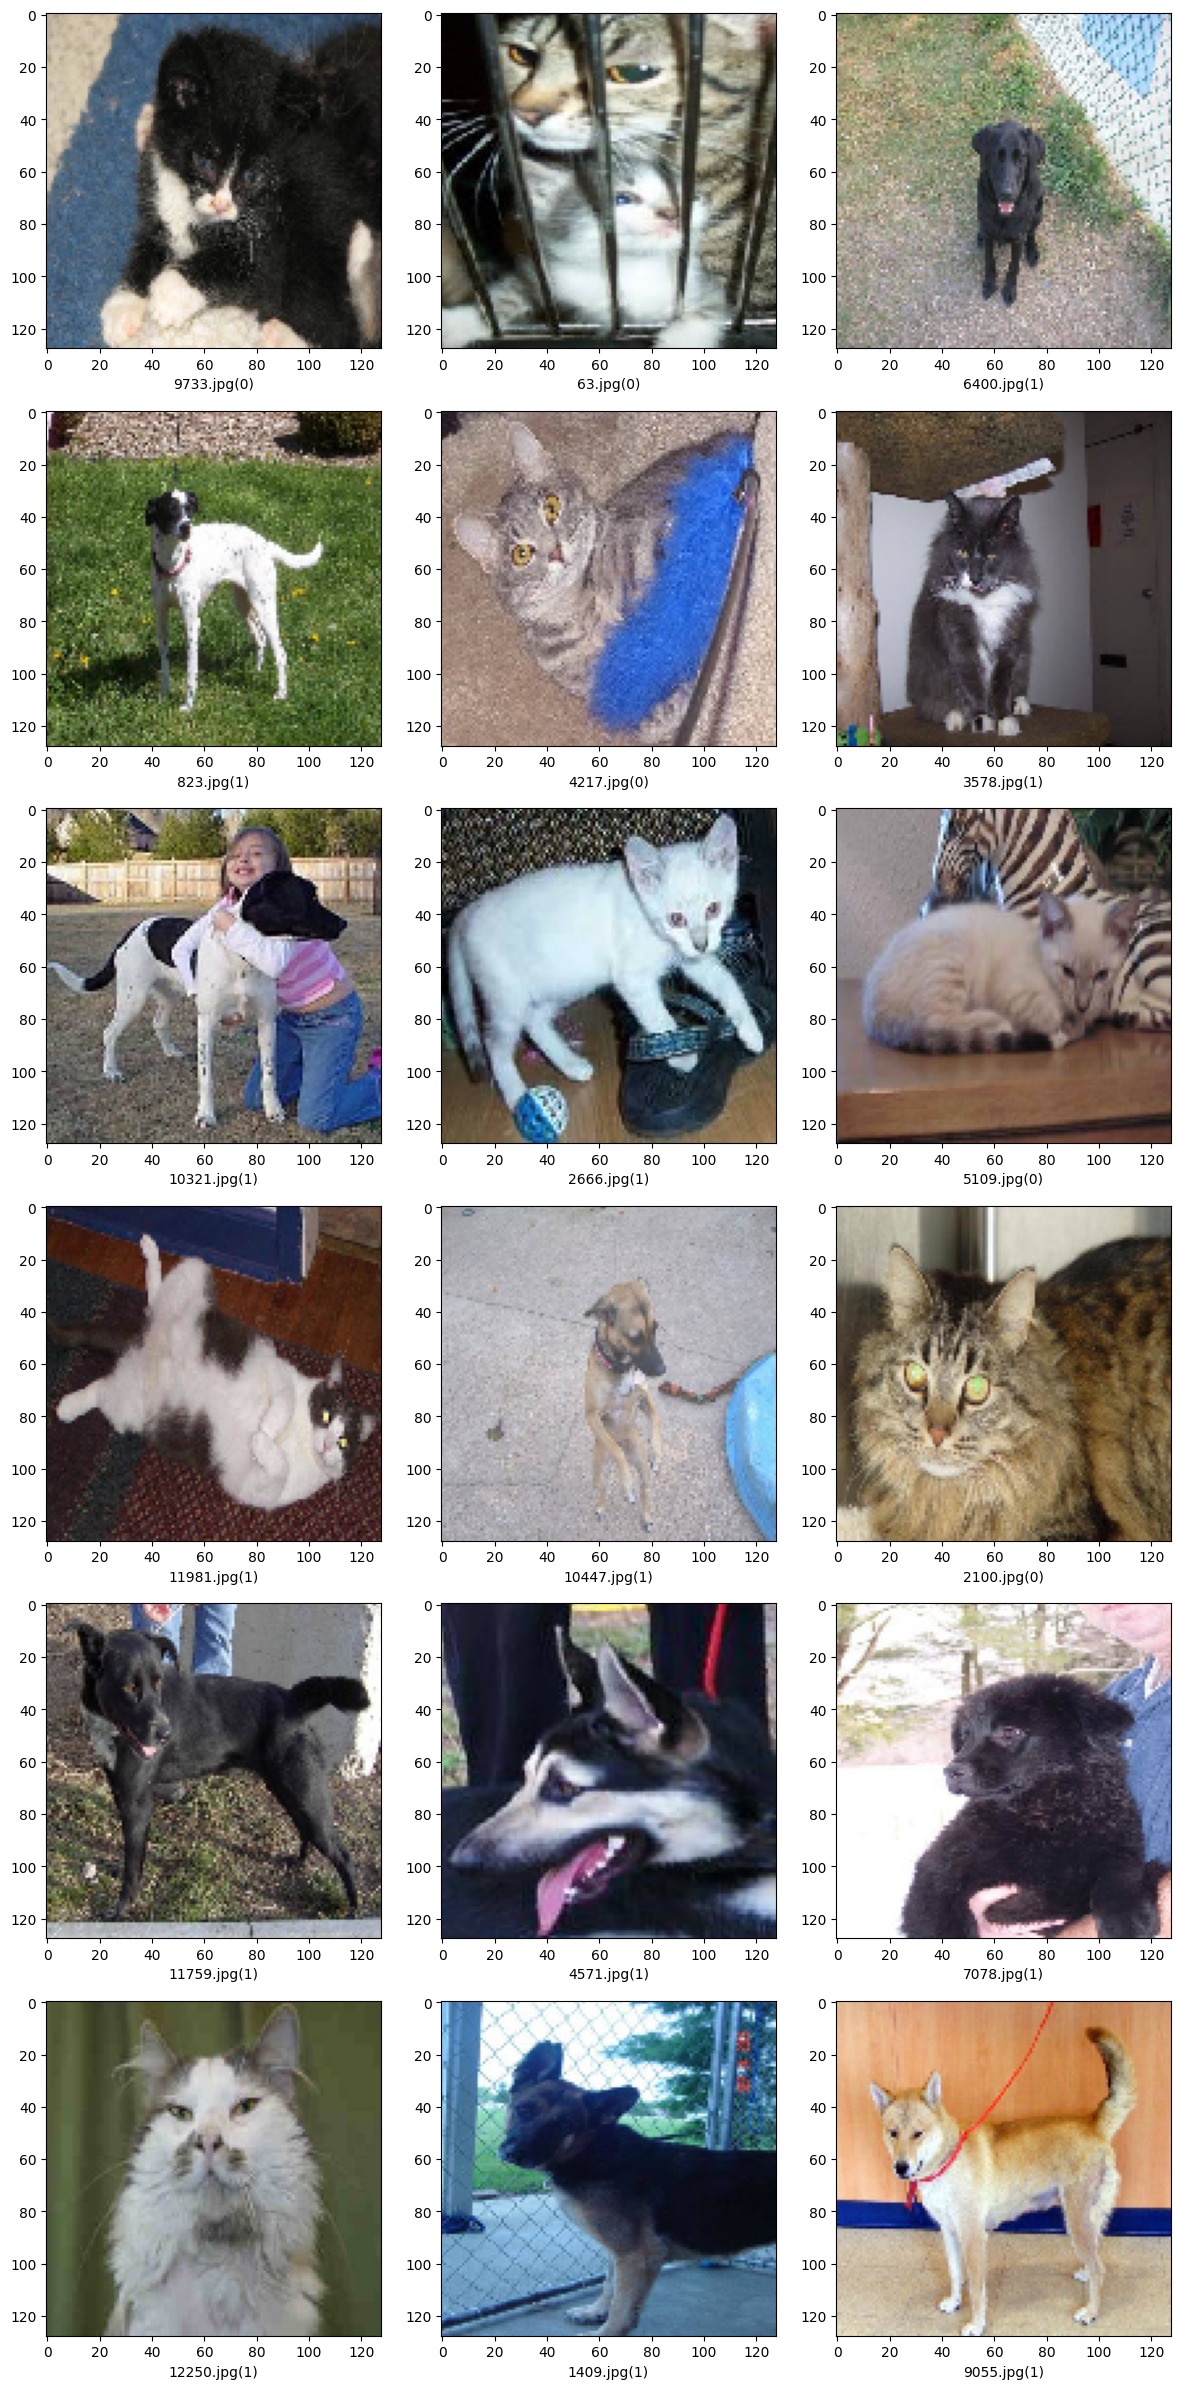

In [131]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row["filename"]
    category = row["category"]
    img = load_img("./test1/" + filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + "(" + "{}".format(category) + ")")
plt.tight_layout()
plt.show()


In [132]:
# calculate accuracy
from sklearn.metrics import accuracy_score

accuracy_score(submission_df["label"], test_df["category"])

0.66488

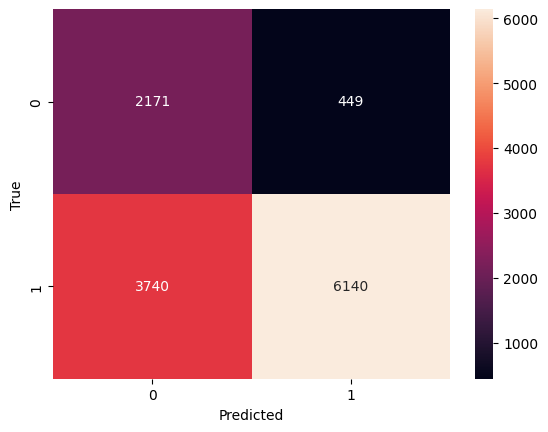

In [134]:
# calculate confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(submission_df["label"], test_df["category"])

# visualize confusion matrix

import seaborn as sns

cm = confusion_matrix(submission_df["label"], test_df["category"])

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()